<a href="https://colab.research.google.com/github/Didac-piferrer/MUDS/blob/main/Agrupacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesado Inicial

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [63]:
#Esta primera linea es cuando trabajamos en Colab
#df = pd.read_csv("sample_data/Global Economy Indicators.csv")

#Esta segunda linea cuando trabajo en VScode
df = pd.read_csv("global-economy-indicators/Global Economy Indicators.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

In [64]:
df.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [65]:
df.tail()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10
10511,894,Zambia,2021,20.018487,20.018487,19473125,Kwacha,1062,6.285287e+08,293485060.0,...,8.423339e+09,7.735235e+09,1.876458e+09,6.639510e+09,4.250492e+09,2.071254e+10,2.060541e+09,3.881353e+09,2.067962e+10,2.131337e+10


Lo primero que vamos a hacer va a ser limpiar los nombres de las columnas para después poder acceder correctamente, ya que como se puede ver, esta mal formateadas, además, los nombres son muy largos, lo que después para las visualizaciones puede suponer un problema

In [66]:
df.columns

Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [67]:
#Eliminamos los espacios
df.columns=df.columns.str.strip()

In [68]:
#Vamos a crear un diccionario que nos asocie los nombre originales con los nuevos nombres abreviados
data_names = {}
for col in df.columns:
    primeras_letras = []
    for palabra in col.split():
        if palabra[0] == "(": #Aqui podemos añadir más caracteres que queramos para nuestro diccionario
            break
        else:
            if len(col.split()) > 1:
                primeras_letras.append(palabra[0])
            else:
                primeras_letras.append(palabra)

    key = ''.join(primeras_letras)
    data_names[key] = col
if len(set(data_names)) == len(data_names):
    print("Ready to create a dictionary:")
    print(data_names)
else:
    pass
    #Aquí deberíamos, en caso de que fuera necesario, separar los elementos que son iguales, y añadirles distintos valores hasta hacerlos únicos.


Ready to create a dictionary:
{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale,

In [69]:
#definimos una función que nos permita obtener el valor del diccionario a traves del valor del diccionario
def get_key_from_value(diccionario,value):
    for k,v in diccionario.items():
        if v == value:
            return k
    return "None" #si el valor no se encuentra

In [70]:
#Renombramos todas las cabeceras de las columnas con los nuevos nombres
for col in df.columns:
    new_name = get_key_from_value(data_names,col)
    df.rename(columns = {col: new_name},inplace=True)

if not "None" in df.columns: print("Rename Succesfull")

Rename Succesfull


In [71]:
#Country y Currency son object type data, así que checkeamos por espacios extra, para verlo con claridad, concatenamos un string al principio y al final para ver como se ve el output.

print("hello" + df['Country'] + "bye")
print("hello" + df['Currency'] + "bye")

0        hello Afghanistan bye
1        hello Afghanistan bye
2        hello Afghanistan bye
3        hello Afghanistan bye
4        hello Afghanistan bye
                 ...          
10507         hello Zambia bye
10508         hello Zambia bye
10509         hello Zambia bye
10510         hello Zambia bye
10511         hello Zambia bye
Name: Country, Length: 10512, dtype: object
0        hello Afghani bye
1        hello Afghani bye
2        hello Afghani bye
3        hello Afghani bye
4        hello Afghani bye
               ...        
10507     hello Kwacha bye
10508     hello Kwacha bye
10509     hello Kwacha bye
10510     hello Kwacha bye
10511     hello Kwacha bye
Name: Currency, Length: 10512, dtype: object


In [72]:
#Efectivamente tenemos espacios extras, por lo tanto tenemos que limpiar también estos datos
df['Country']=df['Country'].str.strip()
df['Currency']=df['Currency'].str.strip()



In [73]:
#Prevenir malos formatos en los numeros
for col in df.select_dtypes(['float64']):
    df[col]=pd.to_numeric(df[col])

In [74]:
#Vemos como ha quedado nuestro dataframe después de este primer formateado
df.head()

,CountryID,Country,Year,Aer,Iber,Population,Currency,PcG,Ahff,Cii,...,Hce,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [75]:
#Y si en cualquier momento queremos ver a que valor hace referencia nuestra columna, sencillamente lo consultamos en nuestro diccionario:
print(data_names['PcG'])

Per capita GNI


Ahora procederemos a entender todos los nulos que nos encontramos

In [76]:
df.isna().sum()

CountryID        0
Country          0
Year             0
Aer              0
Iber             0
Population       0
Currency         0
PcG              0
Ahff           121
Cii           1841
C                0
Eogas           21
Fce              0
Ggfce           52
Gcf             52
Gfcf            52
Hce             52
Iogas           42
M               43
MMU              0
OA               0
TVA              0
Tsac            49
Wrtrah          49
GNIiU            0
GDP              0
dtype: int64

Encontramos un grupo de 4 atributos que tienen el mismo numero de nulos (52), lo que puede dar a entender que se tratan de las mismas entradas, lo mismo con el grupo de 2 atributos de 49 nulos.

Por otro lado encontramos que las variables: <br>
Ahff <br>
Cii<br>
Eogas<br>
Iogas<br>
M<br>
Tienen una cantidad de nulos diferentes entre ellas.

In [77]:
#Comprobamos el grupo de 4 atributos

print("Columna Ggfce, valor: " + data_names["Ggfce"])
print("Columna Gcf, valor: " + data_names["Gcf"])
print("Columna Gfcf, valor: " + data_names["Gfcf"])
print("Columna Hce, valor: " + data_names["Ggfce"])

null4Group = df.loc[df['Ggfce'].isnull(),['Year','Country','Gcf','Gfcf','Hce']]

print(null4Group.shape)
print(null4Group.head())
print(null4Group.tail())

Columna Ggfce, valor: General government final consumption expenditure
Columna Gcf, valor: Gross capital formation
Columna Gfcf, valor: Gross fixed capital formation (including Acquisitions less disposals of valuables)
Columna Hce, valor: General government final consumption expenditure
(52, 5)
      Year          Country  Gcf  Gfcf  Hce
4817  1970  D.P.R. of Korea  NaN   NaN  NaN
4818  1971  D.P.R. of Korea  NaN   NaN  NaN
4819  1972  D.P.R. of Korea  NaN   NaN  NaN
4820  1973  D.P.R. of Korea  NaN   NaN  NaN
4821  1974  D.P.R. of Korea  NaN   NaN  NaN
      Year          Country  Gcf  Gfcf  Hce
4864  2017  D.P.R. of Korea  NaN   NaN  NaN
4865  2018  D.P.R. of Korea  NaN   NaN  NaN
4866  2019  D.P.R. of Korea  NaN   NaN  NaN
4867  2020  D.P.R. of Korea  NaN   NaN  NaN
4868  2021  D.P.R. of Korea  NaN   NaN  NaN


Se confirma que se trata de Korea que tiene nulos en estos 4 valores, posiblemente porque por las politcas del país, no ha proporcionado los datos a las entidades públicas.

In [78]:
#Comprobamos el grupo de 2 atributos
print("Columna Tsac, valor: " + data_names["Ggfce"])
print("Columna Wrtrah, valor: " + data_names["Gcf"])

null2Group = df.loc[df['Tsac'].isnull(),['Year','Country','Wrtrah']]

print(null2Group.shape)
print(null2Group.head())
print(null2Group.tail())

Columna Tsac, valor: General government final consumption expenditure
Columna Wrtrah, valor: Gross capital formation
(49, 3)
      Year          Country  Wrtrah
4817  1970  D.P.R. of Korea     NaN
4818  1971  D.P.R. of Korea     NaN
4819  1972  D.P.R. of Korea     NaN
4820  1973  D.P.R. of Korea     NaN
4821  1974  D.P.R. of Korea     NaN
      Year          Country  Wrtrah
4861  2014  D.P.R. of Korea     NaN
4862  2015  D.P.R. of Korea     NaN
4863  2016  D.P.R. of Korea     NaN
4864  2017  D.P.R. of Korea     NaN
4865  2018  D.P.R. of Korea     NaN


Vemos que también se trata de corea, sin embargo, en este caso, los últimos 3 años, si que han rellanado estos datos.

In [79]:
#Analizamos Ahff
print("Columna Ahff, valor: " + data_names["Ahff"])

Ahff_nulo = df.loc[df['Ahff'].isnull(),['Year','Country']]

print(Ahff_nulo.shape)
print(Ahff_nulo.head())
print(Ahff_nulo.tail())

Ahff_nulo['Country'].value_counts()

Columna Ahff, valor: Agriculture, hunting, forestry, fishing (ISIC A-B)
(121, 2)
      Year           Country
5465  1970  China, Macao SAR
5466  1971  China, Macao SAR
5467  1972  China, Macao SAR
5468  1973  China, Macao SAR
5469  1974  China, Macao SAR
      Year                    Country
6693  2017  Sint Maarten (Dutch part)
6694  2018  Sint Maarten (Dutch part)
6695  2019  Sint Maarten (Dutch part)
6696  2020  Sint Maarten (Dutch part)
6697  2021  Sint Maarten (Dutch part)


Country
China, Macao SAR             52
Monaco                       52
Sint Maarten (Dutch part)    17
Name: count, dtype: int64

In [80]:
#Hemos visto que para Moncao y China si que hay nulos en todo el dataset, sin embargo, vamos a ver que ha pasado con Sint Maarten
sint_maarten = df[df['Country']=="Sint Maarten (Dutch part)"]
sint_maarten

,CountryID,Country,Year,Aer,Iber,Population,Currency,PcG,Ahff,Cii,...,Hce,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP
6681,534,Sint Maarten (Dutch part),2005,1.79,1.79,31494,Netherlands Antillian Guilder,21653,NaN,NaN,...,584027577.0,9.455866e+08,12213279.0,52084069.0,316708880.0,6.700150e+08,87624259.0,153592824.0,6.819475e+08,7.079548e+08
6682,534,Sint Maarten (Dutch part),2006,1.79,1.79,31813,Netherlands Antillian Guilder,22959,NaN,NaN,...,553880908.0,8.825698e+08,12249431.0,53259387.0,339954377.0,7.146686e+08,87859650.0,179618598.0,7.303916e+08,7.582464e+08
6683,534,Sint Maarten (Dutch part),2007,1.79,1.79,32136,Netherlands Antillian Guilder,24204,NaN,NaN,...,628169221.0,9.957542e+08,11817120.0,61029067.0,374681888.0,7.648801e+08,98687631.0,173155822.0,7.778084e+08,8.074715e+08
6684,534,Sint Maarten (Dutch part),2008,1.79,1.79,32456,Netherlands Antillian Guilder,25368,NaN,NaN,...,739491856.0,1.064749e+09,12501529.0,54270928.0,401640326.0,8.069929e+08,105337423.0,185906704.0,8.233328e+08,8.547321e+08
6685,534,Sint Maarten (Dutch part),2009,1.79,1.79,32763,Netherlands Antillian Guilder,25255,NaN,NaN,...,697322881.0,9.589944e+08,10411843.0,56510072.0,421632783.0,8.105421e+08,104572403.0,172398920.0,8.274419e+08,8.589979e+08
6686,534,Sint Maarten (Dutch part),2010,1.79,1.79,33034,Netherlands Antillian Guilder,26142,NaN,NaN,...,693036328.0,9.312849e+08,12825294.0,55961692.0,416814346.0,8.442594e+08,112634541.0,200462507.0,8.635587e+08,8.964921e+08
6687,534,Sint Maarten (Dutch part),2011,1.79,1.79,33309,Netherlands Antillian Guilder,27070,NaN,NaN,...,649963137.0,9.700559e+08,15418994.0,56201117.0,467430168.0,8.689944e+08,95921788.0,183519553.0,9.016760e+08,9.360630e+08
6688,534,Sint Maarten (Dutch part),2012,1.79,1.79,35139,Netherlands Antillian Guilder,29351,NaN,NaN,...,634959424.0,1.110582e+09,14274547.0,58616780.0,554073452.0,9.854286e+08,120768448.0,209259069.0,1.031371e+09,1.066211e+09
6689,534,Sint Maarten (Dutch part),2013,1.79,1.79,37697,Netherlands Antillian Guilder,31029,NaN,NaN,...,763634909.0,1.389095e+09,13269070.0,56680855.0,618187520.0,1.115543e+09,148142821.0,260703676.0,1.169685e+09,1.196493e+09
6690,534,Sint Maarten (Dutch part),2014,1.79,1.79,39100,Netherlands Antillian Guilder,32806,NaN,NaN,...,886121965.0,1.649141e+09,15418994.0,59441341.0,671396648.0,1.257095e+09,192960894.0,312067039.0,1.282705e+09,1.338324e+09


Nos damos cuenta que de Sint Maarten solo tenemos datos desde el 2005, y que las columnas Ahff y Cii estan en nulo, los datos estan desde el 2005 puesto que el referendum se celebra en el cual la isla de San Martín pasa a formar un país se celebra en el 2000.


In [81]:
#Comprobamos Eogas
print("Columna Eogas, valor: " + data_names["Eogas"])

Eogas_nulo = df.loc[df['Eogas'].isnull(),['Year','Country']]

print(Eogas_nulo.shape)
print(Eogas_nulo.head())
print(Eogas_nulo.tail())

Columna Eogas, valor: Exports of goods and services
(21, 2)
      Year        Country
9884  1970  USSR (Former)
9885  1971  USSR (Former)
9886  1972  USSR (Former)
9887  1973  USSR (Former)
9888  1974  USSR (Former)
      Year        Country
9900  1986  USSR (Former)
9901  1987  USSR (Former)
9902  1988  USSR (Former)
9903  1989  USSR (Former)
9904  1990  USSR (Former)


Vemos que estos nulos corresponden a la URSS la cual fue disuelta en 1991, por lo tanto la Unión Sovietica al ser comunista, tiene sentido que no exportara servicios ni bienes

In [82]:
#Comprobamos Iogas
print("Columna Iogas, valor: " + data_names["Iogas"])

Iogas_nulo = df.loc[df['Iogas'].isnull(),['Year','Country']]

print(Iogas_nulo.shape)
print(Iogas_nulo.head())
print(Iogas_nulo.tail())

Czechoslovakia = df[df['Country']=="Czechoslovakia (Former)"]
Czechoslovakia


Columna Iogas, valor: Imports of goods and services
(42, 2)
      Year                  Country
2448  1970  Czechoslovakia (Former)
2449  1971  Czechoslovakia (Former)
2450  1972  Czechoslovakia (Former)
2451  1973  Czechoslovakia (Former)
2452  1974  Czechoslovakia (Former)
      Year        Country
9900  1986  USSR (Former)
9901  1987  USSR (Former)
9902  1988  USSR (Former)
9903  1989  USSR (Former)
9904  1990  USSR (Former)


,CountryID,Country,Year,Aer,Iber,Population,Currency,PcG,Ahff,Cii,...,Hce,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP
2448,200,Czechoslovakia (Former),1970,27.000000,27.000000,14318611,Koruna,1138,1.464428e+09,NaN,...,7.711491e+09,NaN,5.382519e+09,5.382519e+09,5.606440e+09,1.629429e+10,1.142646e+09,1.303701e+09,1.629429e+10,1.629429e+10
2449,200,Czechoslovakia (Former),1971,27.000000,27.000000,14374051,Koruna,1185,1.571409e+09,NaN,...,8.071944e+09,NaN,5.646867e+09,5.646867e+09,5.890876e+09,1.703857e+10,1.126852e+09,1.294277e+09,1.703857e+10,1.703857e+10
2450,200,Czechoslovakia (Former),1972,24.780000,24.780000,14448439,Koruna,1352,1.742078e+09,NaN,...,9.187602e+09,NaN,6.395926e+09,6.395926e+09,6.801337e+09,1.952736e+10,1.169644e+09,1.541181e+09,1.952736e+10,1.952736e+10
2451,200,Czechoslovakia (Former),1973,21.920000,21.920000,14541580,Koruna,1587,2.067821e+09,NaN,...,1.093699e+10,NaN,7.675399e+09,7.675399e+09,8.173946e+09,2.307368e+10,1.203294e+09,1.716945e+09,2.307368e+10,2.307368e+10
2452,200,Czechoslovakia (Former),1974,21.977500,21.977500,14649335,Koruna,1690,2.058626e+09,NaN,...,1.165155e+10,NaN,8.457781e+09,8.457781e+09,8.850337e+09,2.475377e+10,1.306168e+09,1.685284e+09,2.475377e+10,2.475377e+10
2453,200,Czechoslovakia (Former),1975,20.925000,20.925000,14762774,Koruna,1849,2.032888e+09,NaN,...,1.265172e+10,NaN,9.581348e+09,9.581348e+09,9.873855e+09,2.729965e+10,1.425887e+09,1.741085e+09,2.729965e+10,2.729965e+10
2454,200,Czechoslovakia (Former),1976,21.657500,21.657500,14874386,Koruna,1809,1.788311e+09,NaN,...,1.265754e+10,NaN,9.803207e+09,9.803207e+09,9.742041e+09,2.691404e+10,1.478251e+09,1.496562e+09,2.691404e+10,2.691404e+10
2455,200,Czechoslovakia (Former),1977,15.027500,15.027500,14979951,Koruna,2576,3.039655e+09,NaN,...,1.890304e+10,NaN,1.255104e+10,1.255104e+10,1.336005e+10,3.858315e+10,2.289260e+09,3.946925e+09,3.858315e+10,3.858315e+10
2456,200,Czechoslovakia (Former),1978,14.397500,14.397500,15079239,Koruna,2818,3.114506e+09,NaN,...,2.076891e+10,NaN,1.383030e+10,1.383030e+10,1.469053e+10,4.250063e+10,2.608016e+09,4.555165e+09,4.250063e+10,4.250063e+10
2457,200,Czechoslovakia (Former),1979,14.105000,14.105000,15172170,Koruna,3010,2.691595e+09,NaN,...,2.192291e+10,NaN,1.577075e+10,1.577075e+10,1.597471e+10,4.567211e+10,3.112704e+09,4.291575e+09,4.567211e+10,4.567211e+10


De la misma manera que la USSR, Czechoslovakia paso a ser una república federal en el 1990 y además antes de que esto pasaba era un estado Marxista bajo la dominación Sovietica, por lo tanto, también tiene sentido que tenga nulos en las importaciones.

In [83]:
#Comprobamos M
print("Columna M, valor: " + data_names["M"])

M_nulo = df.loc[df['M'].isnull(),['Year','Country']]

print(M_nulo.shape)
print(M_nulo.head())
print(M_nulo.tail())

China = df[df['Country']=="China"]
China

Kiribati = df[df['Country']=="Kiribati"]
Kiribati

Columna M, valor: Manufacturing (ISIC D)
(43, 2)
      Year Country
1948  1970   China
1949  1971   China
1950  1972   China
1951  1973   China
1952  1974   China
      Year   Country
3541  1974  Kiribati
3542  1975  Kiribati
3543  1976  Kiribati
3544  1977  Kiribati
3545  1978  Kiribati


,CountryID,Country,Year,Aer,Iber,Population,Currency,PcG,Ahff,Cii,...,Hce,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP
3537,296,Kiribati,1970,0.892857,0.892857,57437,Australian Dollar,377,2521628.0,301401.0,...,10510386.0,7897224.0,NaN,8266363.0,3084644.0,17034241.0,433277.0,2109702.0,21645388.0,20195540.0
3538,296,Kiribati,1971,0.880608,0.880608,58535,Australian Dollar,361,2305073.0,283587.0,...,9643147.0,7171691.0,NaN,7340463.0,3527426.0,16486155.0,518190.0,2291321.0,21145986.0,20096898.0
3539,296,Kiribati,1972,0.819201,0.819201,59606,Australian Dollar,415,3017897.0,128440.0,...,14395860.0,10382487.0,NaN,6334529.0,5789561.0,18944124.0,425263.0,2546378.0,24734444.0,23892867.0
3540,296,Kiribati,1973,0.704114,0.704114,60598,Australian Dollar,622,4509789.0,926525.0,...,17549557.0,13986890.0,NaN,8794959.0,10657206.0,30199578.0,1039022.0,4255884.0,37675228.0,36642222.0
3541,296,Kiribati,1974,0.638383,0.638383,60953,Australian Dollar,1045,5336382.0,726413.0,...,22283473.0,15827608.0,NaN,15754823.0,15923093.0,49336062.0,2579796.0,9095331.0,63711937.0,62237866.0
3542,296,Kiribati,1975,0.763871,0.763871,60675,Australian Dollar,921,5683879.0,732902.0,...,22023248.0,16601056.0,NaN,11477205.0,18524922.0,45987509.0,2302612.0,7096082.0,55906442.0,56230437.0
3543,296,Kiribati,1976,0.818284,0.818284,60310,Australian Dollar,626,4689839.0,532941.0,...,16861453.0,13488736.0,NaN,6536137.0,16781189.0,34864491.0,1592104.0,4288780.0,37751805.0,39355314.0
3544,296,Kiribati,1977,0.901825,0.901825,59894,Australian Dollar,554,4886569.0,426360.0,...,16302028.0,13840116.0,NaN,4762046.0,19313574.0,34959196.0,1390128.0,3273269.0,33193540.0,34783095.0
3545,296,Kiribati,1978,0.873659,0.873659,59465,Australian Dollar,634,6287719.0,NaN,...,19463965.0,17536839.0,NaN,4514330.0,27646855.0,45282300.0,1498930.0,3085127.0,37695452.0,37964368.0
3546,296,Kiribati,1979,0.894641,0.894641,59775,Australian Dollar,568,6331085.0,NaN,...,18530379.0,18795098.0,3313620.0,3852965.0,16085779.0,32201818.0,1726950.0,2974378.0,33972361.0,33972361.0


Entre los años 2002 y 2004 Jiang Zemin fue remplazado en todos sus cargos por su sucesor Hu Jintao, puede ser que con este cambio de mandato se empezara a registrar este dato de manufcaturación, ya que en ese momento China se encontraba en plena expansión. Por otro lado, Kiribati se independiza del Reino Unido en el 1979.

In [84]:
#Por último, comrpobamos el Cii que es la columna con más nulos en todo nuestro dataset

print("Columna Cii, valor: " + data_names["Cii"])

Cii_nulo = df.loc[df['Cii'].isnull(),['Year','Country']]

print(Cii_nulo.shape)
print(Cii_nulo.head())
print(Cii_nulo.tail())

print(Cii_nulo['Country'].value_counts())
for item in Cii_nulo['Country'].value_counts():
    print(item)


Columna Cii, valor: Changes in inventories
(1841, 2)
   Year      Country
0  1970  Afghanistan
1  1971  Afghanistan
2  1972  Afghanistan
3  1973  Afghanistan
4  1974  Afghanistan
       Year Country
10364  2001   Samoa
10365  2002   Samoa
10366  2003   Samoa
10367  2004   Samoa
10368  2005   Samoa
Country
Afghanistan                 52
Guyana                      52
Tuvalu                      52
Antigua and Barbuda         52
Turks and Caicos Islands    52
                            ..
Cuba                         1
Malaysia                     1
Cameroon                     1
Côte d'Ivoire                1
Tonga                        1
Name: count, Length: 92, dtype: int64
52
52
52
52
52
52
52
52
52
52
52
51
48
45
45
42
41
39
39
38
36
34
33
32
30
27
25
25
24
24
24
24
23
23
23
21
21
21
20
17
17
16
16
15
15
15
14
14
13
12
12
12
11
11
10
10
10
10
10
9
9
9
9
8
8
6
6
6
5
5
5
4
4
4
3
3
3
3
3
2
2
2
2
2
2
1
1
1
1
1
1
1


La variable Change in Inventories es un pequeño componente del GDP, normalmente forma menos del 1% del GDP, y por lo que vemos los nulos estan distribuidos por todos los países.
Además sabemos que la forma más utilizada para calcular el PIB(GDP) de un país es según su demanda agregada: PIB = C + I + G + X – M Donde C el consumo, I la inversión, G el gasto público, X las exportaciones y M las importaciones.

In [85]:
print(data_names)
df.head()

{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale, retail trade, restaurants and

,CountryID,Country,Year,Aer,Iber,Population,Currency,PcG,Ahff,Cii,...,Hce,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [86]:
#Vemos que para los años esta bastante balanceado en general
for year,count in df['Year'].value_counts().items():
    print(str(year) + ": " + str(count))

1990: 216
2008: 214
2009: 214
2010: 214
2012: 213
2011: 213
2005: 212
2006: 212
2007: 212
2021: 212
2013: 212
2015: 212
2016: 212
2017: 212
2018: 212
2019: 212
2014: 212
2020: 212
1991: 211
1992: 211
1993: 211
2002: 210
2000: 210
2001: 210
2003: 210
2004: 210
1998: 210
1999: 210
1996: 210
1997: 210
1995: 210
1994: 210
1989: 188
1980: 187
1972: 187
1973: 187
1974: 187
1975: 187
1976: 187
1977: 187
1978: 187
1979: 187
1982: 187
1981: 187
1971: 187
1983: 187
1984: 187
1985: 187
1986: 187
1987: 187
1988: 187
1970: 187


In [87]:
#A continuación vamnos a ver, teniendo en cuenta los nulos, como de equilibrado esta el dataset a nivel tanto de paises
for country,count in df['Country'].value_counts().items():
    print(country + ": " + str(count))

Afghanistan: 52
Kenya: 52
Mozambique: 52
Oman: 52
Namibia: 52
Nauru: 52
Nepal: 52
Netherlands: 52
Aruba: 52
New Caledonia: 52
Vanuatu: 52
New Zealand: 52
Nicaragua: 52
Niger: 52
Nigeria: 52
Norway: 52
Micronesia (FS of): 52
Marshall Islands: 52
Palau: 52
Pakistan: 52
Panama: 52
Papua New Guinea: 52
Paraguay: 52
Morocco: 52
Montserrat: 52
Mongolia: 52
Luxembourg: 52
Republic of Korea: 52
Kuwait: 52
Lao People's DR: 52
Lebanon: 52
Lesotho: 52
Liberia: 52
Libya: 52
Liechtenstein: 52
Albania: 52
China, Macao SAR: 52
Monaco: 52
Madagascar: 52
Malawi: 52
Malaysia: 52
Maldives: 52
Mali: 52
Malta: 52
Mauritania: 52
Mauritius: 52
Mexico: 52
Peru: 52
Philippines: 52
Poland: 52
Turks and Caicos Islands: 52
Switzerland: 52
Syrian Arab Republic: 52
Thailand: 52
Togo: 52
Tonga: 52
Trinidad and Tobago: 52
United Arab Emirates: 52
Tunisia: 52
Türkiye: 52
Tuvalu: 52
Eswatini: 52
Uganda: 52
Egypt: 52
United Kingdom: 52
U.R. of Tanzania: Mainland: 52
United States: 52
Burkina Faso: 52
Uruguay: 52
Venezue

Vemos que la mayoria tienen 52, excepto los que son Former, que quiere decir que después se han formado otros países y viceversa, los paises que se han formado a partir de estos, no tenian existencia antes, así pues, para tener un dataset balanceado, lo que se haré para esta entrega como para todas las demás, será trabajar con los países que existen desde el 1970, que son la gran mayoría

In [88]:
df_f = df.groupby('Country').filter(lambda x: len(x) == max(df['Country'].value_counts()))
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9308 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CountryID   9308 non-null   int64  
 1   Country     9308 non-null   object 
 2   Year        9308 non-null   int64  
 3   Aer         9308 non-null   float64
 4   Iber        9308 non-null   float64
 5   Population  9308 non-null   int64  
 6   Currency    9308 non-null   object 
 7   PcG         9308 non-null   int64  
 8   Ahff        9204 non-null   float64
 9   Cii         7676 non-null   float64
 10  C           9308 non-null   float64
 11  Eogas       9308 non-null   float64
 12  Fce         9308 non-null   float64
 13  Ggfce       9256 non-null   float64
 14  Gcf         9256 non-null   float64
 15  Gfcf        9256 non-null   float64
 16  Hce         9256 non-null   float64
 17  Iogas       9308 non-null   float64
 18  M           9265 non-null   float64
 19  MMU         9308 non-null   flo

In [89]:
#Miramos, ahora con los nuevos países, cuantos nulos tenemos. Hemos reducido nulos, todo y que seguimos teniendo.
df_f.isna().sum()


CountryID        0
Country          0
Year             0
Aer              0
Iber             0
Population       0
Currency         0
PcG              0
Ahff           104
Cii           1632
C                0
Eogas            0
Fce              0
Ggfce           52
Gcf             52
Gfcf            52
Hce             52
Iogas            0
M               43
MMU              0
OA               0
TVA              0
Tsac            49
Wrtrah          49
GNIiU            0
GDP              0
dtype: int64

In [90]:
#Tenemos dos variables categoricas, "Currency" y "Country", para la de Country, podemos crear un diccionario que nos identifique el countryID con la country y de esta manera ya la tendriamos numerica, pero la de currency
print(data_names)
df_f.tail()

{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale, retail trade, restaurants and

,CountryID,Country,Year,Aer,Iber,Population,Currency,PcG,Ahff,Cii,...,Hce,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10
10511,894,Zambia,2021,20.018487,20.018487,19473125,Kwacha,1062,6.285287e+08,293485060.0,...,8.423339e+09,7.735235e+09,1.876458e+09,6.639510e+09,4.250492e+09,2.071254e+10,2.060541e+09,3.881353e+09,2.067962e+10,2.131337e+10


# Analizando el dataset y todas sus variables, nos pueden interesar:
- AMA exchange rate ( Cambio basado en las tasas de cambio de moneda proporcionadas por el Fondo Monetario Internacion (FMI), así pues, este es el valor de la moneda y lo que vale 1USD.)
- Population
- Per Capita GNI (El ingreso nacional bruto (GNI) per cápita e suna medida económica que representa el promedio del ingreso nacional bruto de un país dividido por su pòblación total (ya vemos que tendra correlación con la variable Population))
- Gross National Income (GNI) in USD
- GDP

EL resto de variables son las diferentes contribuciones segmentadas de los países en la economia.

A continuación lo podremos ver en la matríz de correlaciones

La variable categorica Currency, demomento la descartaremos, de igual forma que la Country ya que crearemos un diccionario con el CountryID como llave y country como valor

In [91]:
dicc_pais = dict(zip(df_f['CountryID'], df_f['Country']))
dicc_pais

{4: 'Afghanistan',
 8: 'Albania',
 12: 'Algeria',
 20: 'Andorra',
 24: 'Angola',
 28: 'Antigua and Barbuda',
 32: 'Argentina',
 36: 'Australia',
 40: 'Austria',
 44: 'Bahamas',
 48: 'Bahrain',
 50: 'Bangladesh',
 52: 'Barbados',
 56: 'Belgium',
 60: 'Bermuda',
 64: 'Bhutan',
 68: 'Bolivia (Plurinational State of)',
 72: 'Botswana',
 76: 'Brazil',
 84: 'Belize',
 90: 'Solomon Islands',
 92: 'British Virgin Islands',
 96: 'Brunei Darussalam',
 100: 'Bulgaria',
 104: 'Myanmar',
 108: 'Burundi',
 116: 'Cambodia',
 120: 'Cameroon',
 124: 'Canada',
 132: 'Cabo Verde',
 136: 'Cayman Islands',
 140: 'Central African Republic',
 144: 'Sri Lanka',
 148: 'Chad',
 152: 'Chile',
 156: 'China',
 170: 'Colombia',
 174: 'Comoros',
 178: 'Congo',
 180: 'D.R. of the Congo',
 184: 'Cook Islands',
 188: 'Costa Rica',
 192: 'Cuba',
 196: 'Cyprus',
 204: 'Benin',
 208: 'Denmark',
 212: 'Dominica',
 214: 'Dominican Republic',
 218: 'Ecuador',
 222: 'El Salvador',
 226: 'Equatorial Guinea',
 242: 'Fiji',
 246

In [92]:
#Eliminamos nuestras variables categoricas
df_f = df_f.drop(['Country','Currency'],axis=1)
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9308 entries, 0 to 10511
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CountryID   9308 non-null   int64  
 1   Year        9308 non-null   int64  
 2   Aer         9308 non-null   float64
 3   Iber        9308 non-null   float64
 4   Population  9308 non-null   int64  
 5   PcG         9308 non-null   int64  
 6   Ahff        9204 non-null   float64
 7   Cii         7676 non-null   float64
 8   C           9308 non-null   float64
 9   Eogas       9308 non-null   float64
 10  Fce         9308 non-null   float64
 11  Ggfce       9256 non-null   float64
 12  Gcf         9256 non-null   float64
 13  Gfcf        9256 non-null   float64
 14  Hce         9256 non-null   float64
 15  Iogas       9308 non-null   float64
 16  M           9265 non-null   float64
 17  MMU         9308 non-null   float64
 18  OA          9308 non-null   float64
 19  TVA         9308 non-null   flo

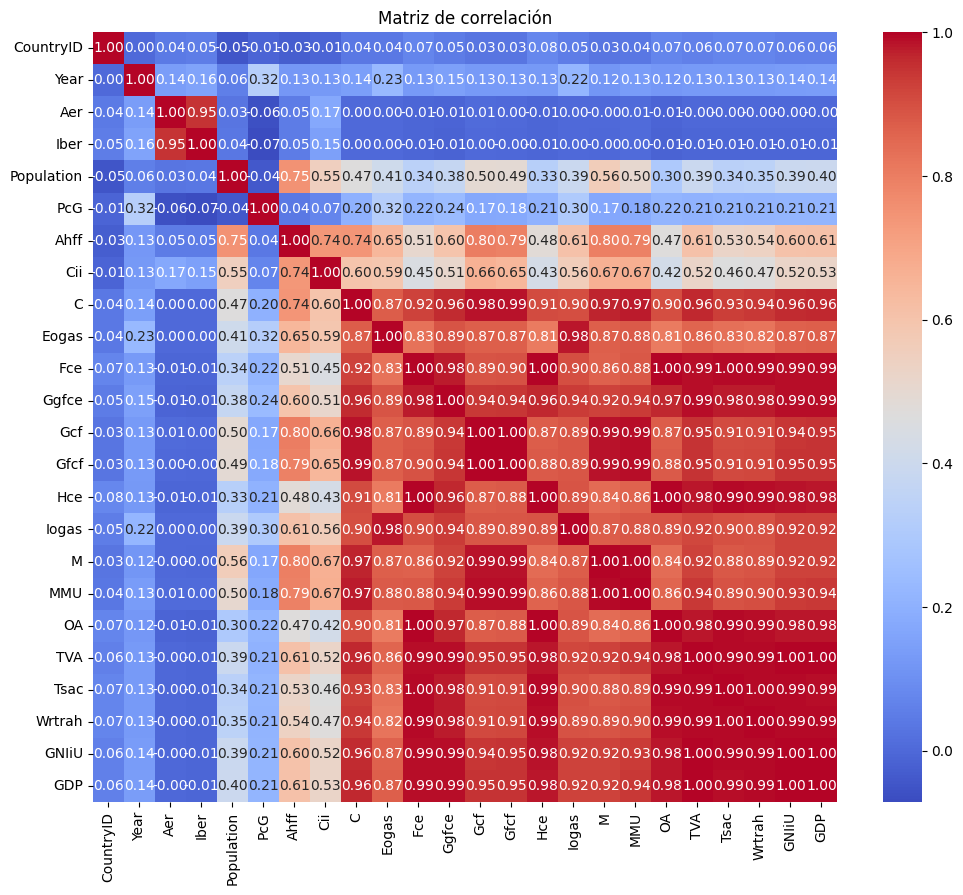

{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale, retail trade, restaurants and

In [93]:
#Antes de eliminar ningunos nulos, vamos a realizar una matriz de correlación con las variables numericas que tenemos
plt.figure(figsize=(12, 10))
sns.heatmap(df_f.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()
print(data_names)


Como podemos observar por el mapa de calor en matriz de correlación, todo lo que son las distintas contribuciones ligadas con el GDP tienen una correlación muy elevada ya que si un país funciona economicamente, lo más probable es que funcione en todos los aspectos, sin embargo la que si que esta más floja es la de Agriculture, hunting, forestry y fishing(sector primario), ya que después de la revolución industrial tiene sentido que este sector no sea el más fuerte y el que más contribuya a la economia. El Change in Inventories no tiene mucha correlacion tampoco con el grupo del GDP y derivados y eso podria ser a que los cambios de en el valor de los inventarios producidos por el pais quiza no son tan relevantes para la economia.



# Planteamiento del problema
Vamos a tratar de agrupar los paises por continentes, pero para ello primero tenemos que limpiar nuestro dataset de nulos. <br>
Ahff           104 <br>
Cii           1632 <br>
Ggfce           52 <br>
Gcf             52 <br>
Gfcf            52 <br>
Hce             52 <br>
M               43 <br>
Tsac            49 <br>
Wrtrah          49 <br>
Ahff            104

In [95]:
##Eliminamos los nulos y variables que no nos estan dando información o información repetida,
#En el caso del cuadrado de calor, nos quedaremos solo con la GDP
#df_f = df_f.drop(['Cii','Ggfce','Gcf','Gfcf','Hce','M','Tsac','Wrtrah','Ahff','Iber','C','Eogas','Fce','PcG','Iogas','OA','TVA','GNIiU'],axis=1)
#df_f.info()
df_f = df_f.drop(['Cii','Ggfce','Gcf','Gfcf','Hce','M','Tsac','Wrtrah','Ahff'],axis=1)
df_f.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9308 entries, 0 to 10511
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CountryID   9308 non-null   int64  
 1   Year        9308 non-null   int64  
 2   Aer         9308 non-null   float64
 3   Iber        9308 non-null   float64
 4   Population  9308 non-null   int64  
 5   PcG         9308 non-null   int64  
 6   C           9308 non-null   float64
 7   Eogas       9308 non-null   float64
 8   Fce         9308 non-null   float64
 9   Iogas       9308 non-null   float64
 10  MMU         9308 non-null   float64
 11  OA          9308 non-null   float64
 12  TVA         9308 non-null   float64
 13  GNIiU       9308 non-null   float64
 14  GDP         9308 non-null   float64
dtypes: float64(11), int64(4)
memory usage: 1.1 MB


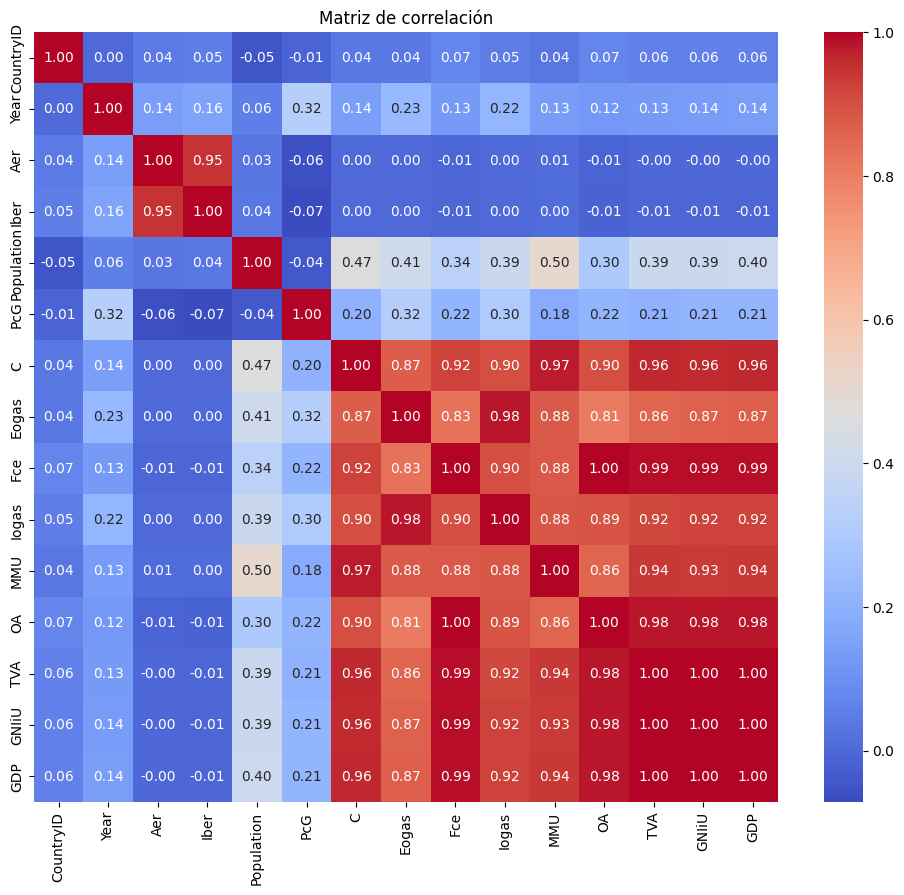

{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale, retail trade, restaurants and

In [96]:
#Realizamos otra vez la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df_f.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()
print(data_names)

In [97]:
# Scatter plot using seaborn package
#plt.figure(figsize = (5, 20))
#sns.pairplot(df_f, height=2, palette = "tab10")
#plt.show()

En esta grafica, sin aún haber asignado las etiquetas de clusterización, vemos como hay dos paises que el crecimiento ha sido mucho más exponencial. Además vemos que antes del año 2010 el GDP era bastante igual en algunos paises, por lo tanto, como nos interesa clasificar reduciremos nuestro dataset.

Nuestra variable objetivo será saber si el país es considerado potencia mundial o no.

Aquí tenemos una lista con los paises que son potencias mundiales desde 2010 según https://es.statista.com/grafico/22415/clasificacion-mundial-de-paises-en-funcion-de-su-pib/:

1. Estados Unidos
2. China
3. Japón
4. Alemania
5. Rusia
6. Brasil
7. Francia
8. Reino Unido
9. Italia
10. Indonesia


Por lo tanto, nuestra clasificación consistirá en saber si son potencia mundial o no, y como en potencia solo hemos declarado 10, para tener un datasaet balanceado, cogeremos que no sean potencia mundial otros 10 de forma aleatoria.





In [98]:
dicc_pais

{4: 'Afghanistan',
 8: 'Albania',
 12: 'Algeria',
 20: 'Andorra',
 24: 'Angola',
 28: 'Antigua and Barbuda',
 32: 'Argentina',
 36: 'Australia',
 40: 'Austria',
 44: 'Bahamas',
 48: 'Bahrain',
 50: 'Bangladesh',
 52: 'Barbados',
 56: 'Belgium',
 60: 'Bermuda',
 64: 'Bhutan',
 68: 'Bolivia (Plurinational State of)',
 72: 'Botswana',
 76: 'Brazil',
 84: 'Belize',
 90: 'Solomon Islands',
 92: 'British Virgin Islands',
 96: 'Brunei Darussalam',
 100: 'Bulgaria',
 104: 'Myanmar',
 108: 'Burundi',
 116: 'Cambodia',
 120: 'Cameroon',
 124: 'Canada',
 132: 'Cabo Verde',
 136: 'Cayman Islands',
 140: 'Central African Republic',
 144: 'Sri Lanka',
 148: 'Chad',
 152: 'Chile',
 156: 'China',
 170: 'Colombia',
 174: 'Comoros',
 178: 'Congo',
 180: 'D.R. of the Congo',
 184: 'Cook Islands',
 188: 'Costa Rica',
 192: 'Cuba',
 196: 'Cyprus',
 204: 'Benin',
 208: 'Denmark',
 212: 'Dominica',
 214: 'Dominican Republic',
 218: 'Ecuador',
 222: 'El Salvador',
 226: 'Equatorial Guinea',
 242: 'Fiji',
 246

China
United States
India
Japan
Germany
Indonesia
Brazil
France
United Kingdom
Italy

In [99]:
# No hemos cogido Rusia porque no estaba en nuestro primer diccionarrio, pero puede ser muy interesante dejarlo fuera del entrenamiento para a posteriori ver, en que grupo no los clasificaria.

#filtramos solo del año 2010 en adelante
df_fy = df_f[df_f['Year'] >= 2010]
df_fy

,CountryID,Year,Aer,Iber,Population,PcG,C,Eogas,Fce,Iogas,MMU,OA,TVA,GNIiU,GDP
40,4,2010,46.452461,46.452461,28189672,522,6.242155e+08,2.686044e+09,1.698774e+10,5.103525e+09,1.153161e+09,4.363794e+09,1.369468e+10,1.472478e+10,1.469889e+10
41,4,2011,46.747008,46.747008,29249157,593,6.495823e+08,2.096071e+09,1.908625e+10,5.750744e+09,1.457992e+09,5.514299e+09,1.627213e+10,1.733178e+10,1.735069e+10
42,4,2012,50.921400,50.921400,30466479,629,6.721504e+08,2.055180e+09,1.971352e+10,7.005630e+09,1.456272e+09,6.079761e+09,1.777511e+10,1.916678e+10,1.913650e+10
43,4,2013,55.377500,55.377500,31541209,624,6.674810e+08,2.455424e+09,1.943561e+10,7.026277e+09,1.315378e+09,6.358588e+09,1.810244e+10,1.969026e+10,1.962180e+10
44,4,2014,57.247500,57.247500,32716210,598,6.822803e+08,2.772040e+09,1.939596e+10,6.352480e+09,1.257932e+09,6.981407e+09,1.835999e+10,1.954844e+10,1.955070e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,2017,9.519501,9.519501,17298054,1448,2.455717e+09,9.052008e+09,1.570240e+10,9.465895e+09,7.194153e+09,6.187124e+09,2.416662e+10,2.505604e+10,2.586816e+10
10508,894,2018,10.458143,10.458143,17835893,1451,2.516889e+09,9.987351e+09,1.517590e+10,9.717269e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.588455e+10,2.631198e+10
10509,894,2019,12.889418,12.889418,18380477,1246,2.560457e+09,8.073600e+09,1.397026e+10,7.961415e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.291011e+10,2.331036e+10
10510,894,2020,18.344093,18.344093,18927715,928,2.661361e+09,8.474000e+09,9.633640e+09,5.892353e+09,4.269405e+09,4.217431e+09,1.718020e+10,1.756233e+10,1.811064e+10


In [100]:
media_GDP = df_f.groupby('CountryID')['GDP'].mean()
top10 = media_GDP.nlargest(10)
print(top10)
def wp_calculation(country):
    if country in top10:
        return 1 #True
    else:
        return 0 #False

df_fy['WP'] = df_fy['CountryID'].apply(wp_calculation)

df_fy.tail()


CountryID
840    9.321346e+12
392    3.417731e+12
156    3.372873e+12
276    2.095904e+12
826    1.515096e+12
250    1.507346e+12
380    1.200442e+12
76     8.450019e+11
124    8.358121e+11
356    8.314980e+11
Name: GDP, dtype: float64


C:\Users\Didac\AppData\Local\Temp\ipykernel_11428\1875756253.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fy['WP'] = df_fy['CountryID'].apply(wp_calculation)


,CountryID,Year,Aer,Iber,Population,PcG,C,Eogas,Fce,Iogas,MMU,OA,TVA,GNIiU,GDP,WP
10507,894,2017,9.519501,9.519501,17298054,1448,2.455717e+09,9.052008e+09,1.570240e+10,9.465895e+09,7.194153e+09,6.187124e+09,2.416662e+10,2.505604e+10,2.586816e+10,0
10508,894,2018,10.458143,10.458143,17835893,1451,2.516889e+09,9.987351e+09,1.517590e+10,9.717269e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.588455e+10,2.631198e+10,0
10509,894,2019,12.889418,12.889418,18380477,1246,2.560457e+09,8.073600e+09,1.397026e+10,7.961415e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.291011e+10,2.331036e+10,0
10510,894,2020,18.344093,18.344093,18927715,928,2.661361e+09,8.474000e+09,9.633640e+09,5.892353e+09,4.269405e+09,4.217431e+09,1.718020e+10,1.756233e+10,1.811064e+10,0
10511,894,2021,20.018487,20.018487,19473125,1062,3.252117e+09,1.150134e+10,1.144464e+10,7.735235e+09,6.639510e+09,4.250492e+09,2.071254e+10,2.067962e+10,2.131337e+10,0


In [101]:
#Vemos como esperabamos que no esta balanceado, así que cogeremos 10 paises con 0 al azar
df_fy['WP'].value_counts()

WP
0    2028
1     120
Name: count, dtype: int64

In [102]:
#creamos las llaves disponibles que tenemos que no forman parte del top10
random.seed(42)
key_availables = [key for key in dicc_pais.keys() if key not in top10]

non_wp = random.sample(key_availables,10)

#a continuación vamos a extrer los countryID del top10 y los vamos a juntar con los otros seleccionados

wp_keys = [key for key,val in top10.items()]

total_wp_nonwp = non_wp + wp_keys
total_wp_nonwp

df_fy_final = df_fy[df_fy['CountryID'].isin(total_wp_nonwp)]


df_fy_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 384 to 10144
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CountryID   240 non-null    int64  
 1   Year        240 non-null    int64  
 2   Aer         240 non-null    float64
 3   Iber        240 non-null    float64
 4   Population  240 non-null    int64  
 5   PcG         240 non-null    int64  
 6   C           240 non-null    float64
 7   Eogas       240 non-null    float64
 8   Fce         240 non-null    float64
 9   Iogas       240 non-null    float64
 10  MMU         240 non-null    float64
 11  OA          240 non-null    float64
 12  TVA         240 non-null    float64
 13  GNIiU       240 non-null    float64
 14  GDP         240 non-null    float64
 15  WP          240 non-null    int64  
dtypes: float64(11), int64(5)
memory usage: 31.9 KB


Vemos como ya nos hemos quedado con el dataset que nos interesa, con los últimos 12 años, balanceado

Volvemos a realizar la matriz de covarianza y ahora podremos hacer el scatterplot y usar el WP como label en los puntos.


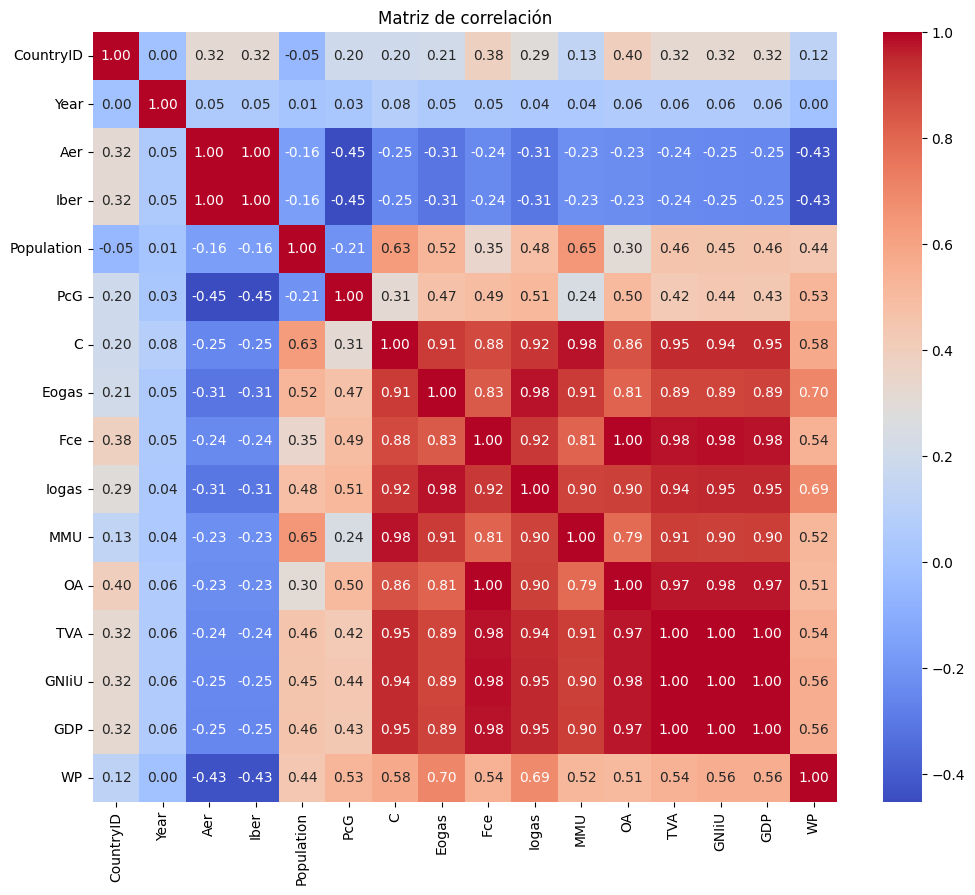

{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale, retail trade, restaurants and

In [103]:
#Realizamos otra vez la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df_fy_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()
print(data_names)

c:\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

<Figure size 500x2000 with 0 Axes>

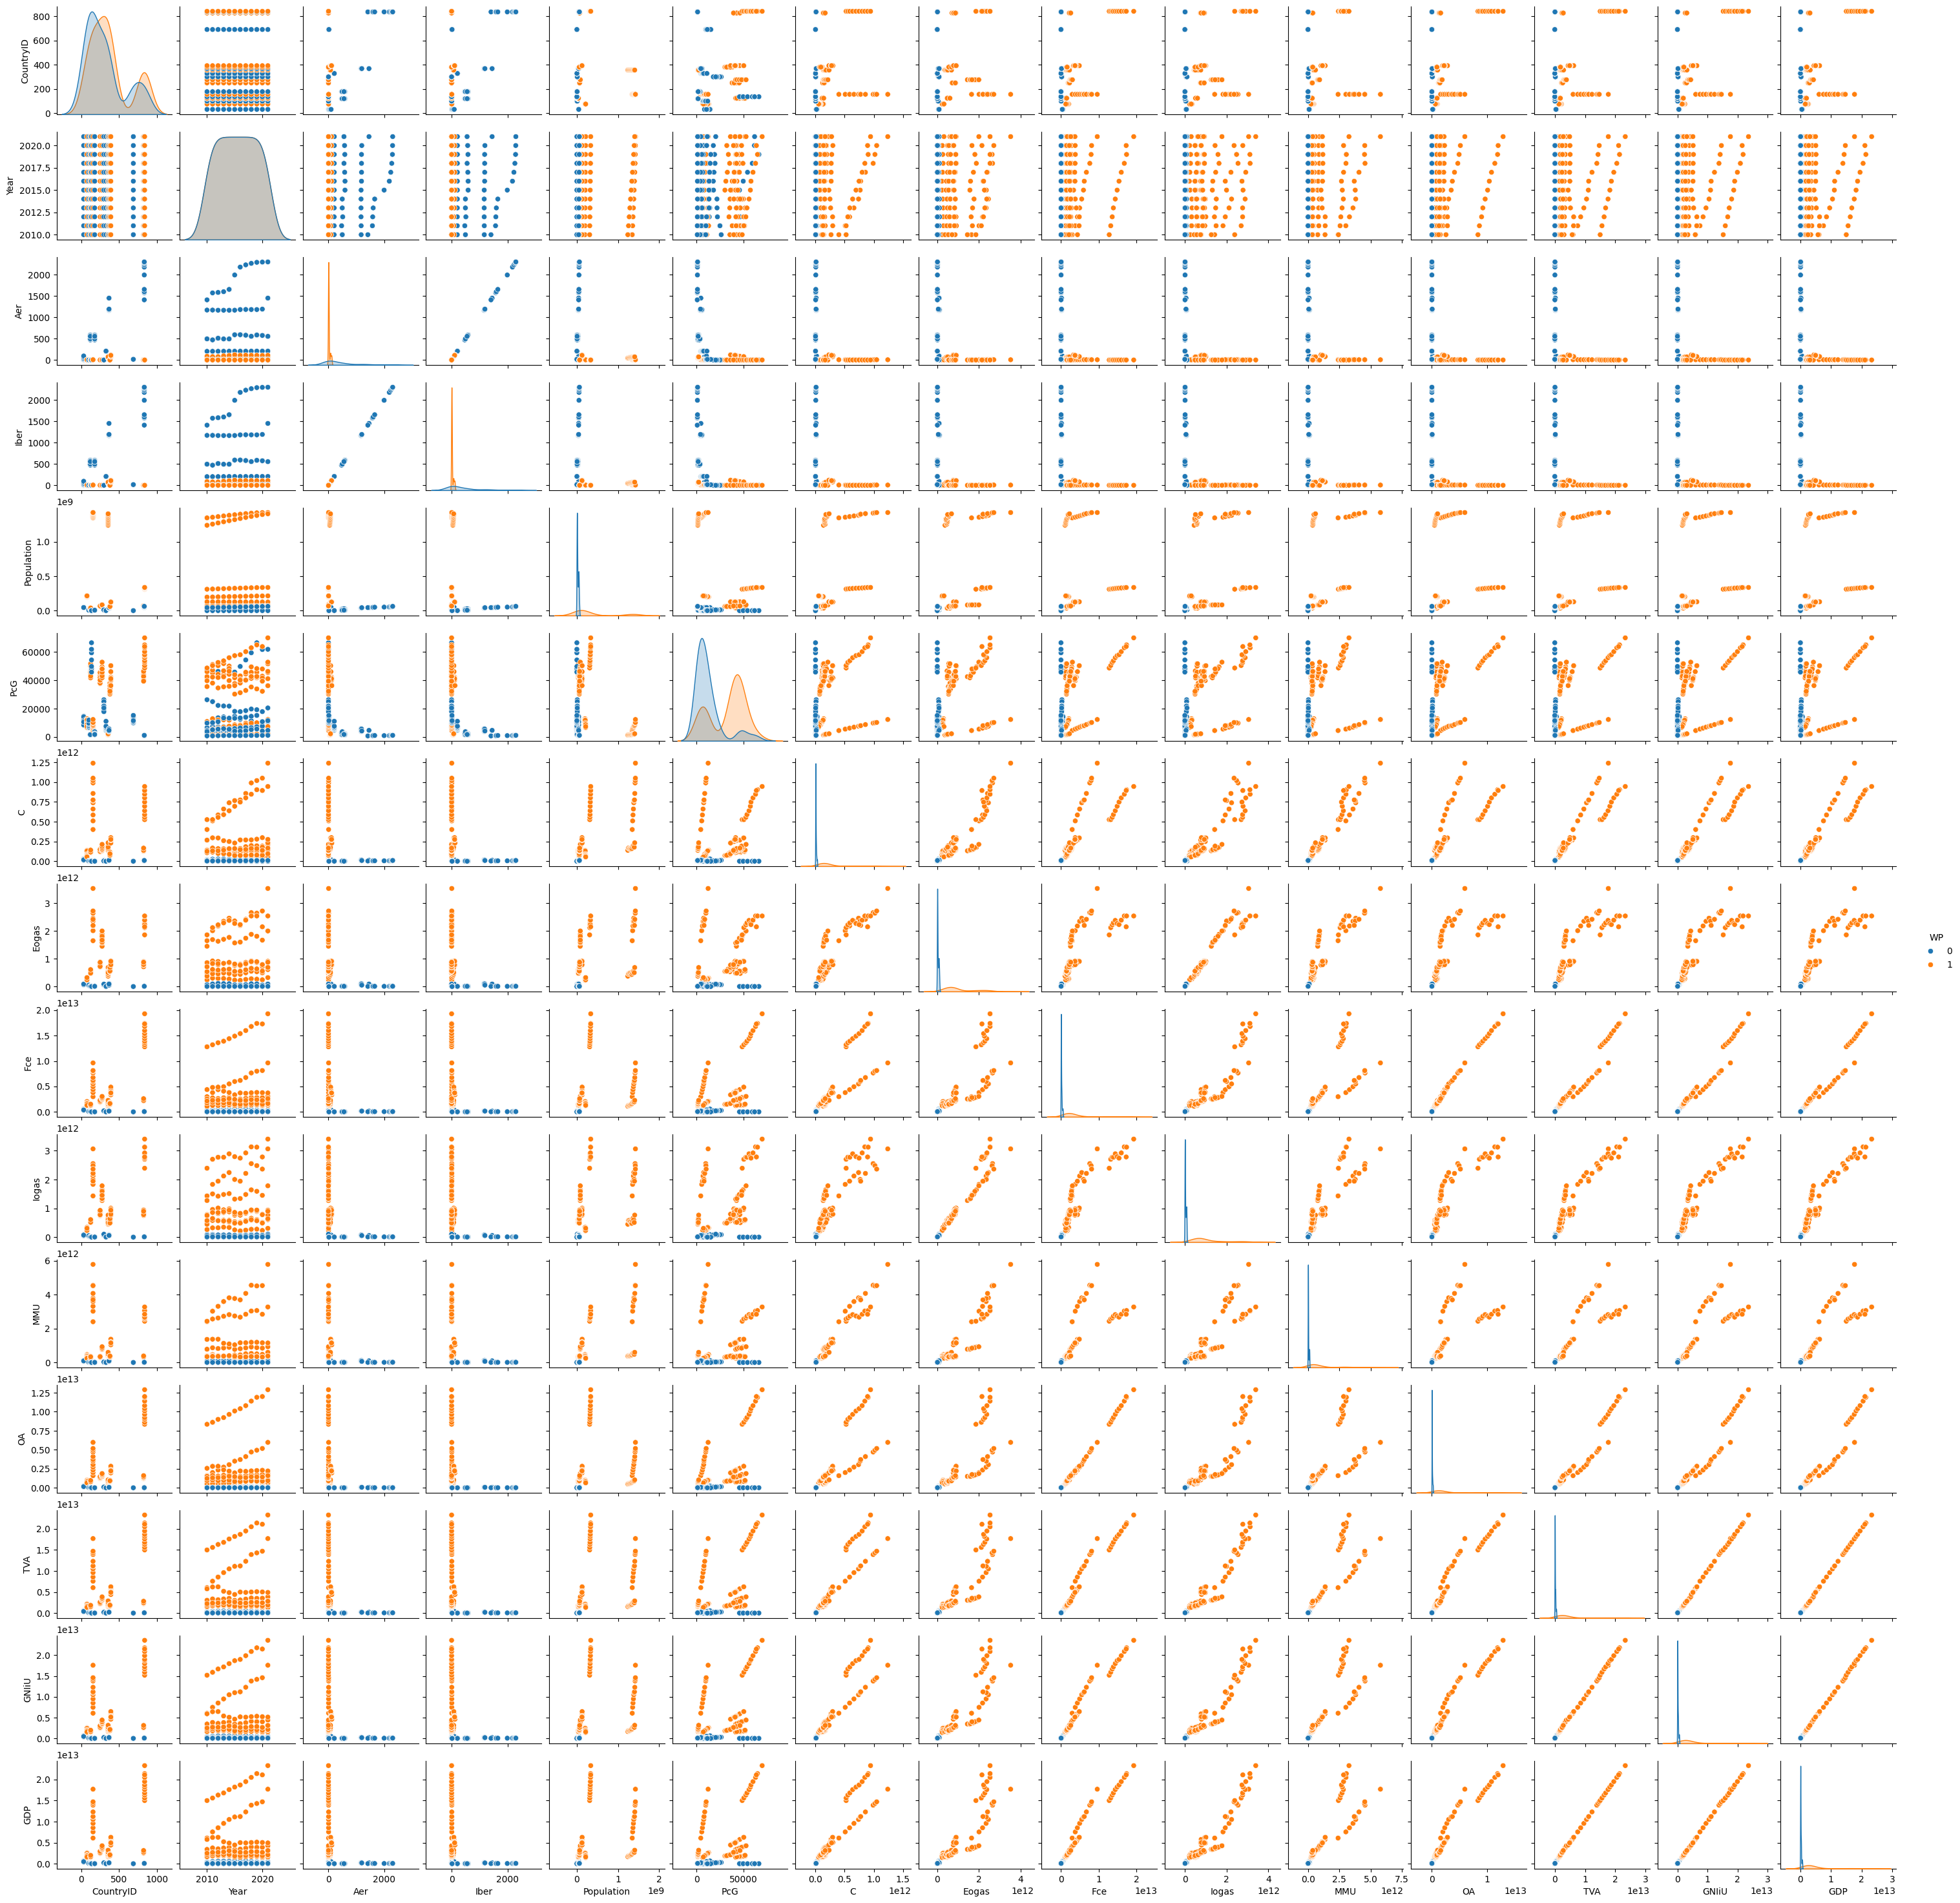

In [104]:
# Scatter plot using seaborn package
plt.figure(figsize = (5, 20))
sns.pairplot(df_fy_final, height=2, hue = 'WP',palette = "tab10")
plt.show()

En una primera iteración eliminamos variables sin haberlas mostrado, y gracias a que se decidió imprimirlas todas las que no eran nulas, se decidió conseguir una correlación que generalizaba mejor.

Podemos observar algunas variables que nos pueden ayudar a clasificar como por ejemplo la MMU con el GDP se pueden diferenciar que hay tres grupos claros y quiza un pequeño subgrupo en la esquina inferior derecha, esto puede ser por el hecho de que hay dos potencias mundiales que destacan mucho por encima del resto.


Sin embargo, sí que vemos que la variable Aer/Iber junto con el GDP y todas sus derivadas, discierne claramente dos grupos y que concuerdan con las etiquetas que hemos puesto. Esto es debido a que la mayoria de las potencias mundiales que hemos seteado, tienen una conversión de moneda muy cercano al USD estadounidense. 

Así pues, en una primera instancia nos quedaremos con estas dos variables para realizar nuestros modelos de agrupación (Aer y GDO), pero tal y como se verá más adelante, la GDP debido a los algoritmos de agrupación no será la que mejor resultados nos dé, sino agrupará mejor con la PcG, y esto tiene sentido, ya que el por definición sabemos que: el Ingreso Nacional Bruto (INB) per cápita es una medida económica que refleja el ingreso promedio de un país dividido por su población total. Es un indicador importante utilizado para evaluar el nivel de riqueza, desarrollo económico y bienestar general de un país. El INB per cápita se diferencia del Producto Interno Bruto (PIB) per cápita en que el INB incluye, además de la producción interna de bienes y servicios, los ingresos netos recibidos del exterior (como intereses y dividendos), menos los pagos similares hechos al exterior. Por lo tanto, justo lo que potencia que un país sea potencia mundial.


# Clustering

### Método Jerarquico

En este primer método, se hizo una primera aproximación erronea, ya comentada.

Ya que en la primera iteración eliminamos columnas que no habiamos investigado todavia  en la cual se añadian todas las variables al modelo y después se decidia entrenar, con este método, se obtuvieron muy malos resultados, ya que se añadia mucho ruido y el árbol no podia discernir bien. En esta segunda aproximación hemos visto que probando de clasificar la con las variables PcG y Aer, el modelo generalizaba mucho mejor. En el codigo se dejara comentado tambien la opción de eliminar el PcG en lugar y dejar el GDP ya que fue la primera aproximación y ha sido cuando se ha llegado a la conclusion por la dispersión de los datos, viendo como el algoritmo agrupaba y viendo la gráfica de arriba como esta hacia todas las dispersiones, donde se llego a la conclusión que el PcG con el Aer era la combinación más idonea para realizar la agrupación.

In [139]:
# Few packages for visualize and more
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

df_fy_final


,CountryID,Year,Aer,Iber,Population,PcG,C,Eogas,Fce,Iogas,MMU,OA,TVA,GNIiU,GDP,WP
384,32,2010,3.896295,3.896295,41100123,10023,1.859999e+10,8.075038e+10,3.390000e+11,6.839660e+10,8.912551e+10,1.330000e+11,3.580000e+11,4.120000e+11,4.260000e+11,0
385,32,2011,4.110140,4.110140,41520740,12404,2.571446e+10,9.780999e+10,4.240000e+11,8.883832e+10,1.080000e+11,1.680000e+11,4.450000e+11,5.150000e+11,5.300000e+11,0
386,32,2012,4.536934,4.536934,41952365,13532,2.822699e+10,9.441193e+10,4.740000e+11,8.307882e+10,1.140000e+11,1.950000e+11,4.880000e+11,5.680000e+11,5.810000e+11,0
387,32,2013,5.459353,5.459353,42388269,14159,2.992466e+10,8.964947e+10,5.080000e+11,9.026022e+10,1.170000e+11,2.080000e+11,5.150000e+11,6.000000e+11,6.130000e+11,0
388,32,2014,8.075276,8.075276,42824054,12970,2.628860e+10,8.168629e+10,4.670000e+11,7.939448e+10,1.110000e+11,1.890000e+11,4.760000e+11,5.550000e+11,5.670000e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10140,840,2017,1.000000,1.000000,329791231,60297,8.010000e+11,2.390000e+12,1.600000e+13,2.920000e+12,2.840000e+12,1.080000e+13,1.950000e+13,1.990000e+13,1.950000e+13,1
10141,840,2018,1.000000,1.000000,332140037,63038,8.470000e+11,2.540000e+12,1.680000e+13,3.130000e+12,3.030000e+12,1.140000e+13,2.050000e+13,2.090000e+13,2.050000e+13,1
10142,840,2019,1.000000,1.000000,334319671,65101,9.040000e+11,2.540000e+12,1.740000e+13,3.120000e+12,3.060000e+12,1.190000e+13,2.140000e+13,2.180000e+13,2.140000e+13,1
10143,840,2020,1.000000,1.000000,335942003,63917,8.940000e+11,2.150000e+12,1.730000e+13,2.780000e+12,2.840000e+12,1.200000e+13,2.110000e+13,2.150000e+13,2.110000e+13,1


En la siguiente celda se visualiza como se muestra el Dendrograma con todas las variables no nulas.

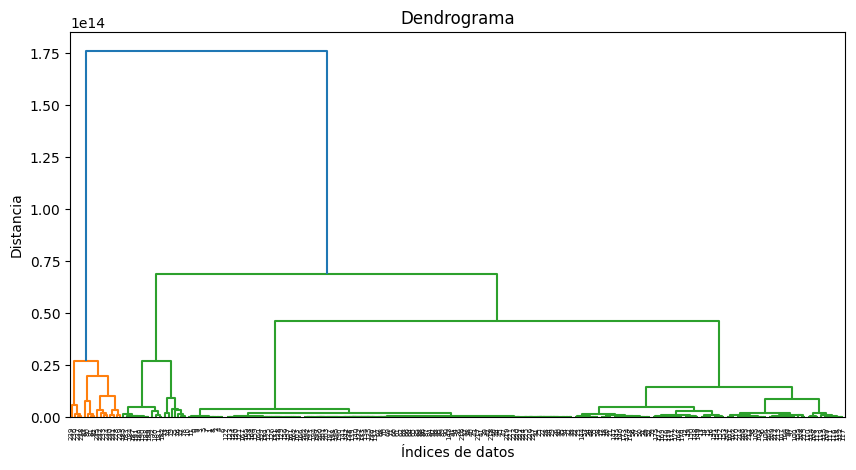

In [150]:
# Calcular la matriz de distancia
dist_matrix = linkage(df_fy_final, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(dist_matrix)
plt.title('Dendrograma')
plt.xlabel('Índices de datos')
plt.ylabel('Distancia')
plt.show()

In [155]:
# Realizar clustering jerárquico

#mydf_jer = df_fy_final.drop(['CountryID','Year','Iber','Population','C','Eogas','Fce','Iogas','MMU','OA','TVA','GNIiU','GDP'], axis=1)
mydf_jer = df_fy_final.drop(['CountryID','Year','Iber','Population','C','Eogas','Fce','Iogas','MMU','OA','TVA','GNIiU','PcG'], axis=1)

print(mydf_jer.info())
agglomerative_cluster = AgglomerativeClustering(n_clusters=2)
cluster_labels = agglomerative_cluster.fit_predict(mydf_jer)


<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 384 to 10144
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Aer     240 non-null    float64
 1   GDP     240 non-null    float64
 2   WP      240 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.6 KB
None


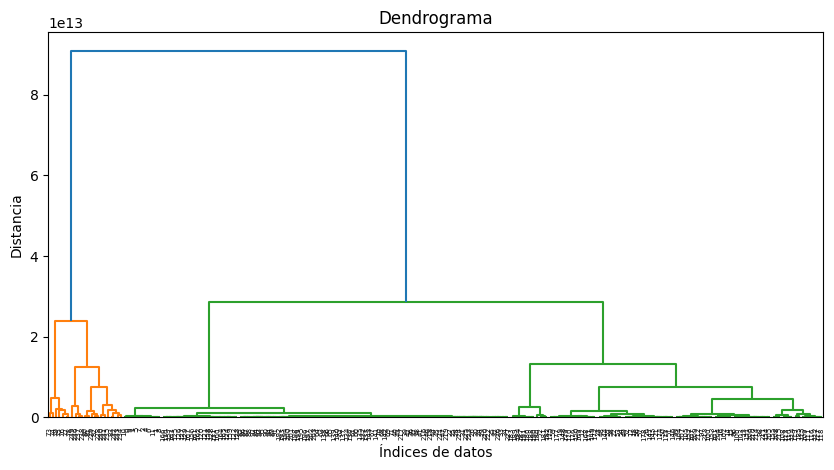

In [156]:
# Calcular la matriz de distancia
dist_matrix = linkage(mydf_jer, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(dist_matrix)
plt.title('Dendrograma')
plt.xlabel('Índices de datos')
plt.ylabel('Distancia')
plt.show()

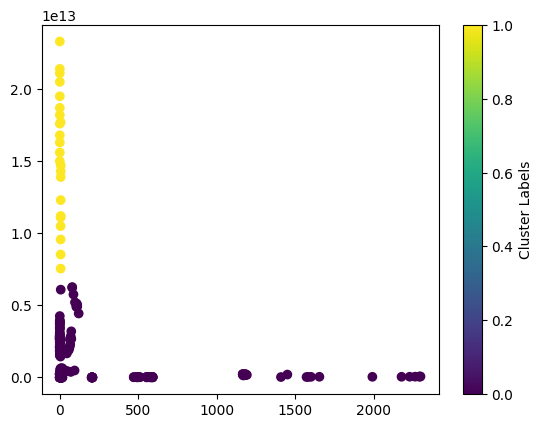

In [157]:
x = mydf_jer['Aer']
#y = mydf_jer['PcG']
y = mydf_jer['GDP']

plt.scatter(x,y, c = agglomerative_cluster.labels_)

# Add colorbar
plt.colorbar(label='Cluster Labels')

plt.show()

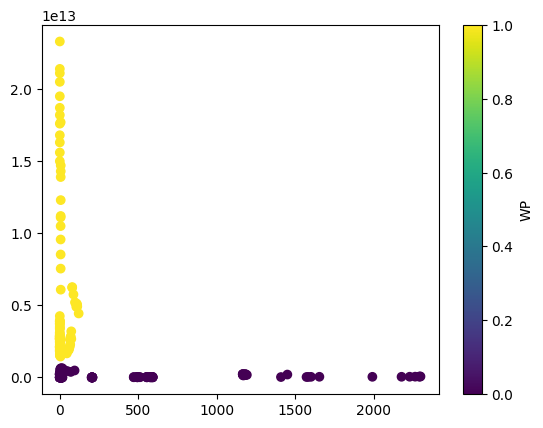

In [158]:
#Ahora comparamos con los dos grupos de verdad
x = mydf_jer['Aer']
#y = mydf_jer['PcG']
y = mydf_jer['GDP']

plt.scatter(x,y, c = mydf_jer['WP'])

# Add colorbar
plt.colorbar(label='WP')

plt.show()

In [159]:
from sklearn.metrics import confusion_matrix
confusion_matrix(mydf_jer['WP'], agglomerative_cluster.labels_)


array([[120,   0],
       [ 97,  23]], dtype=int64)

In [160]:
agglomerative_cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [161]:
#Importante cambiar el orden ya que estan a la inversa
r_cluster = []
for predClass in agglomerative_cluster.labels_:
  if predClass == 1:
    r_cluster.append(0)
  else:
    r_cluster.append(1)

In [162]:
from sklearn.metrics import f1_score
f1_score(mydf_jer['WP'], r_cluster, average = 'macro')

0.2878338278931751

Vemos como el metodo jerarquico no clasifica nada bien en absoulto a nivel de precision. Esto es por culpa de la parte inferior izquierda ya que hay muchos puntos en esa zona que corresponen a potencias mundiales pero que no se estan cogiendo como tal. De hecho en la matriz de confusión se puede observar como todos los errores son de un tipo.

### K-Means

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [115]:
#Redimensionamos el dataset para tener las dos dimensiones con las que vamos a realizar el entrenamiento del kmeans
mydf_kmeans = df_fy_final
mydf_kmeans = mydf_kmeans.drop(['CountryID','Year','Population','MMU'],axis=1)
mydf_kmeans

,Aer,Iber,PcG,C,Eogas,Fce,Iogas,OA,TVA,GNIiU,GDP,WP
384,3.896295,3.896295,10023,1.859999e+10,8.075038e+10,3.390000e+11,6.839660e+10,1.330000e+11,3.580000e+11,4.120000e+11,4.260000e+11,0
385,4.110140,4.110140,12404,2.571446e+10,9.780999e+10,4.240000e+11,8.883832e+10,1.680000e+11,4.450000e+11,5.150000e+11,5.300000e+11,0
386,4.536934,4.536934,13532,2.822699e+10,9.441193e+10,4.740000e+11,8.307882e+10,1.950000e+11,4.880000e+11,5.680000e+11,5.810000e+11,0
387,5.459353,5.459353,14159,2.992466e+10,8.964947e+10,5.080000e+11,9.026022e+10,2.080000e+11,5.150000e+11,6.000000e+11,6.130000e+11,0
388,8.075276,8.075276,12970,2.628860e+10,8.168629e+10,4.670000e+11,7.939448e+10,1.890000e+11,4.760000e+11,5.550000e+11,5.670000e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10140,1.000000,1.000000,60297,8.010000e+11,2.390000e+12,1.600000e+13,2.920000e+12,1.080000e+13,1.950000e+13,1.990000e+13,1.950000e+13,1
10141,1.000000,1.000000,63038,8.470000e+11,2.540000e+12,1.680000e+13,3.130000e+12,1.140000e+13,2.050000e+13,2.090000e+13,2.050000e+13,1
10142,1.000000,1.000000,65101,9.040000e+11,2.540000e+12,1.740000e+13,3.120000e+12,1.190000e+13,2.140000e+13,2.180000e+13,2.140000e+13,1
10143,1.000000,1.000000,63917,8.940000e+11,2.150000e+12,1.730000e+13,2.780000e+12,1.200000e+13,2.110000e+13,2.150000e+13,2.110000e+13,1


In [116]:
#Seleccionamos los datos para entrenamiento y el atributo objetivo
X_data = mydf_kmeans.iloc[:, :-1] #cogemos todas las columnas, excepto la última
y_class = mydf_kmeans.iloc[:, -1] #cogemos solo la útlima columna

# La partición se realiza 80% entrenamiento y 20% de validación para tener más muestras de entrenamiento debido al tamaño
# del dataset. Fijando random_state nos aseguramos la repetibilidad del resultado en ejecuciones posteriores
X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_class, test_size=0.20,random_state=4)

print("Tamaño dataset entrenamiento:",X_train.shape)
print("Tamaño dataset validación:",X_test.shape)

Tamaño dataset entrenamiento: (192, 11)
Tamaño dataset validación: (48, 11)


Eliminar la celda de abajo ya que si que se conoce el dataset

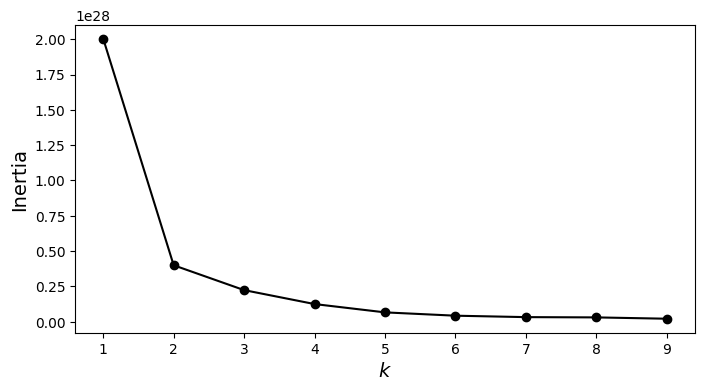

In [117]:
#Aquí vamos a probar cual es el número de clusters que mejor proporciona el algoritmo del kmeans

# Generación de 'k' modelos KMeans para el cálculo de inercias, con todo el dataset conjuntamente
kmeans_model_list = [KMeans(n_clusters=k, random_state=4).fit(X_data) for k in range(1, 10)]


# Cálculo de la inercia por cada modelo generado previamente.
# Con la graficación del resultado podremos observar el "codo"
inertias = [model.inertia_ for model in kmeans_model_list]


#seteamos el tamaño de la figura
plt.figure(figsize=(8, 4))

#Visualización de las inercias y los números de clústers
plt.plot(range(1, 10), inertias, "ko-")

# Etiquetas ejes horizontal y vertical
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

Vemos como claremente Kmeans ya detecta como el codo empieza con K=2

In [118]:
#Generación del modelo con 2 clústeres y predicción de éste
kmeans_pw = KMeans(n_clusters=2,random_state=4).fit(X_train)

#Una vez el algoritmo se ha entrenado, generamos las predicciones
pred_kmeans_pw = kmeans_pw.fit_predict(X_test)

#Comparativa de las predicciones con los valores reales utilizando la función confusion matrix
confusion_matrix(Y_test, pred_kmeans_pw)

array([[29,  0],
       [16,  3]], dtype=int64)

Vemos que de la misma forma que con el agrupamiento jerárquico, todos los fallos se encuentran en predicciones erroneas diciendo que no son wp cuando en realidad si que lo son. <br>

A continuación realizamos unas transformaciones para poder mostrar el grafico del comportamiento del Kmeans.

Precisión: 0.6666666666666666
(2, 11)
[[2.79916605e+02 2.79916605e+02 1.92891556e+04 5.47239253e+10
  2.50880113e+11 7.70539385e+11 2.56263039e+11 4.25169362e+11
  9.02670882e+11 9.98003707e+11 9.99513761e+11]
 [2.96692242e+00 2.96692242e+00 4.54450000e+04 8.77666667e+11
  2.54666667e+12 1.39433333e+13 2.88333333e+12 9.24000000e+12
  1.85333333e+13 1.87333333e+13 1.85333333e+13]]


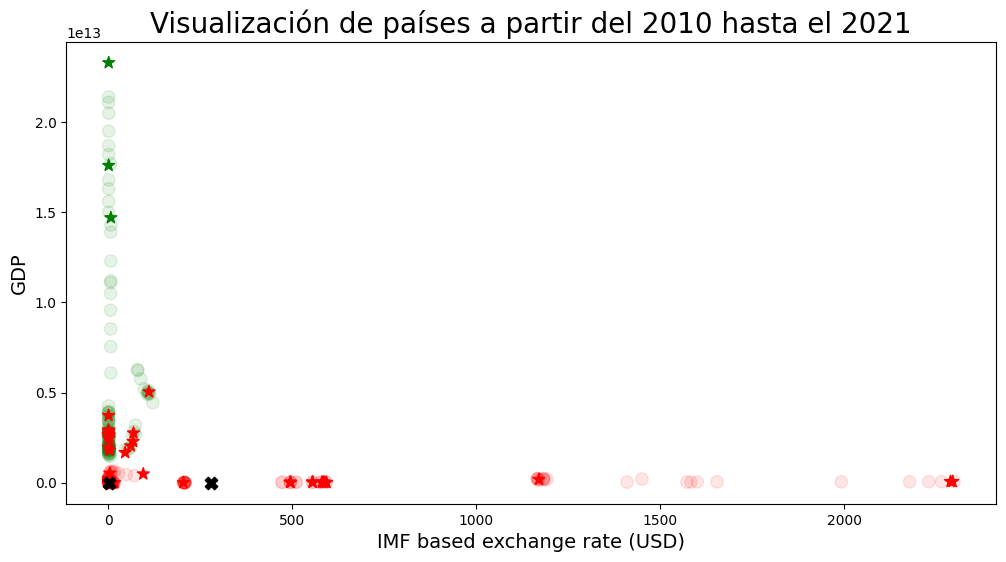

In [119]:
# Función para asignar los mismos colores en función del 'target'
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        else:
            cols.append('green')
    return cols

cols_train = pltcolor(Y_train)

#Necesario modificar el vector de predicción por la asignación aleatoria del algoritmo a las etiquetas
pred_wp = []
for index in range(0,len(pred_kmeans_pw)):
    if pred_kmeans_pw[index] == 0:
        pred_wp.append(0)
    elif pred_kmeans_pw[index] == 1:
        pred_wp.append(1)
    else:
        pass

cols_vald = pltcolor(pred_wp)


print("Precisión:",accuracy_score(Y_test, pred_wp))


#Generamos la visualización del comportamiento del Kmeans

plt.figure(figsize=(12, 6))
plt.title("Visualización de países a partir del 2010 hasta el 2021", fontsize = 20)
# Etiquetas ejes horizontal y vertical
plt.xlabel("IMF based exchange rate (USD)", fontsize=14)
plt.ylabel("GDP", fontsize=14)

# Instancias de entrenamiento
plt.scatter(X_train['Aer'], X_train['GDP'], c=cols_train, marker = "o", alpha=0.1, s = 80)

# Clasificación
plt.scatter(X_test['Aer'], X_test['GDP'], c = cols_vald, marker = "*", s = 80)

# Centroides
centroids = kmeans_pw.cluster_centers_
print(centroids.shape)
print(centroids)
plt.scatter(centroids[:,0], centroids[:,1] , s = 80, color = 'k', marker = 'X')



Con las "X" se muestran los centroides y el porque hay tantos fallos cuando tratamos de acertar potencias que no tienen el GDP tan disparado. Y es porque muchas de las potencias mundiales que tenemos en el dataset seguramente sean Europeas y con el GDP no tan elevado como lo puede tener estados unidos y china, y como estamos mirando un total de 12 años, hay una gran aglomeración de puntos cerca del cero en el intercambio de moneda (Euro) y la cantidad de paises con un GDP extremo y con un intercambio de moneda exagerado es mucho menor.

### DBASCAN